<a href="https://colab.research.google.com/github/GuilhermeDumam/Desafio_Conta_Azul/blob/Master/desafio_conta_azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTAÇÃO BIBLIOTECAS e DATASET**

##Base de dados

https://docs.google.com/spreadsheets/d/1qU9oeYgrrpXGAiqiB9jZ_uQgoXxEuRLVU9iPj83UTkw/edit?usp=sharing

In [158]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly           
import pandas as pd
import numpy as np
import random

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
from pandas_profiling import ProfileReport

In [4]:
from scipy import stats

In [5]:
df = pd.read_csv(('/content/customer_churn_data1.csv'), sep=';',decimal=',')

#**Tratamento**

In [ ]:
df.head()

In [ ]:
df.columns

In [6]:
columns_renamed = {
    'Tipo de empresa': 'tipo_de_empresa', 
    'Tipo de empresa': 'tipo_de_empresa', 
    'Fundação da empresa': 'fundacao_da_empresa', 
    'Possui mais de um sócio': 'possui_mais_de_um_socio', 
    'Funcionários': 'funcionarios',
    'Meses de permanência ': 'meses_de_permanencia', 
    'Utiliza serviços financeiros': 'utiliza_servicos_financeiros',
    'PossuiContador': 'possui_contador', 
    'Faz conciliação bancária': 'faz_conciliacao_bancaria', 
    'Frequência de utilização de feature do sistema: Módulo financeiro': 'frequencia_de_utilizacao_modulo_financeiro', 
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal': 'frequencia_de_utilizacao_sistema_emissao_de_nota_fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária': 'frequencia_de_utilizacao_integracao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo de vendas': 'frequencia_de_utilizacao_modulo_de_vendas',
    'Frequência de utilização de feature do sistema: Relatórios': 'frequencia_de_utilizacao_sistema_relatorios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração': 'frequencia_de_utilizacao_sistema_de_apis_de_integracao',
    'Contrato': 'contrato',
    'Emite boletos': 'emite_boletos',
    'Emite boletos.1': 'emite_boletos_1',
    'Tipo de pagamento': 'tipo_de_pagamento',
    'Receita mensal': 'receita_mensal',
    'Receita total': 'receita_total',
    'Churn': 'churn'
}
df.rename(columns=columns_renamed, inplace=True)

In [27]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7036 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   tipo_de_empresa                                          7036 non-null   object 
 1   fundacao_da_empresa                                      7036 non-null   int64  
 2   possui_mais_de_um_socio                                  7036 non-null   int64  
 3   funcionarios                                             7036 non-null   object 
 4   meses_de_permanencia                                     7036 non-null   int64  
 5   utiliza_servicos_financeiros                             7036 non-null   int64  
 6   possui_contador                                          7036 non-null   int64  
 7   faz_conciliacao_bancaria                                 7036 non-null   object 
 8   frequencia_de_utilizacao_mod

(7036, 20)

In [ ]:
df[df.duplicated()].count()

In [20]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()/df.shape[0]

In [8]:
df['possui_contador'].fillna(df['possui_contador'].mode()[0], inplace=True)

In [9]:
df['receita_total'].fillna(df['receita_mensal'], inplace=True)

In [10]:
df.drop(columns=['ID'], inplace=True)

In [11]:
df.drop(columns = ['emite_boletos_1'], inplace = True)

In [12]:
df.loc[df.churn == 'Não', 'churn'] = 0
df.loc[df.churn == 'Sim', 'churn'] = 1

In [13]:
df['churn'] = df['churn'].astype(int)

In [14]:
df.loc[df.possui_mais_de_um_socio == 'Não', 'possui_mais_de_um_socio'] = 0
df.loc[df.possui_mais_de_um_socio == 'Sim', 'possui_mais_de_um_socio'] = 1

In [15]:
df['possui_mais_de_um_socio'] = df['possui_mais_de_um_socio'].astype(int)

In [16]:
df.loc[df.utiliza_servicos_financeiros == 'Não', 'utiliza_servicos_financeiros'] = 0
df.loc[df.utiliza_servicos_financeiros == 'Sim', 'utiliza_servicos_financeiros'] = 1

In [17]:
df['utiliza_servicos_financeiros'] = df['utiliza_servicos_financeiros'].astype(int)

In [18]:
df.loc[df.possui_contador == 'Não', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Não ', 'possui_contador'] = 0
df.loc[df.possui_contador == 'Sim', 'possui_contador'] = 1

In [19]:
df['possui_contador'] = df['possui_contador'].astype(int)

#**EDA**

In [116]:
df.describe()

fundacao_da_empresa  possui_mais_de_um_socio  ...  receita_total        churn
count          7036.000000              7036.000000  ...    7036.000000  7036.000000
mean           2016.733371                 0.483513  ...    2282.036264     0.265208
std               4.583395                 0.499764  ...    2266.746785     0.441475
min            2001.000000                 0.000000  ...      18.800000     0.000000
25%            2016.000000                 0.000000  ...     400.225000     0.000000
50%            2018.000000                 0.000000  ...    1396.575000     0.000000
75%            2020.000000                 1.000000  ...    3792.325000     1.000000
max            2021.000000                 1.000000  ...    8684.800000     1.000000

[8 rows x 9 columns]

In [ ]:
df.head()

In [21]:
profile = ProfileReport(
    df, title='Profile_EDA', html={'style': {'full_width': True}}, sort=None)

In [22]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Avaliação de Distribuições e Densidade


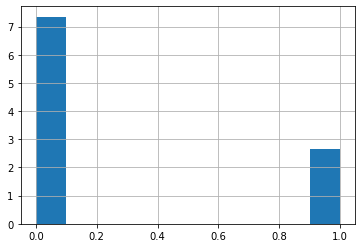

In [37]:
df.churn.hist(density = True)

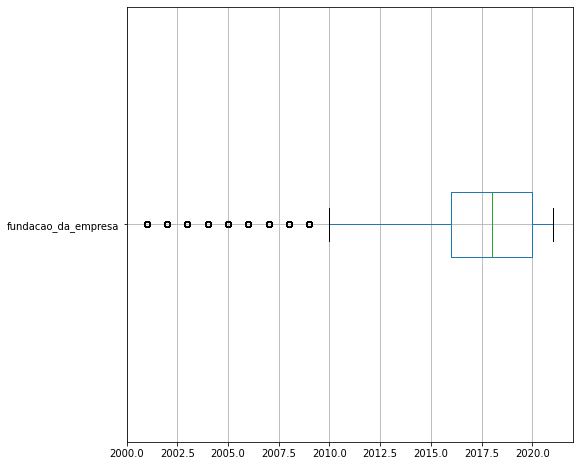

In [110]:
plt.figure(figsize =(8,8))
df.boxplot('fundacao_da_empresa',vert=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribuição do Churn')

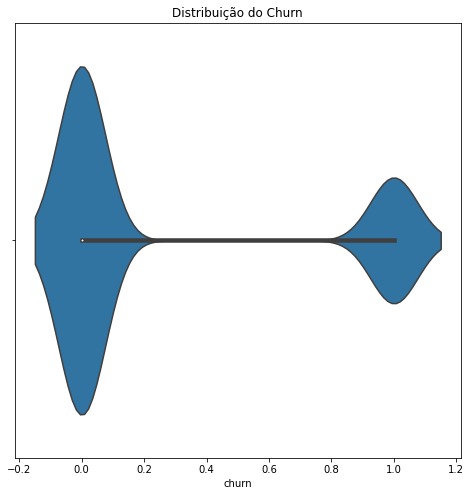

In [38]:
plt.figure(figsize = (8,8))
sns.violinplot(df.churn)
plt.title('Distribuição do Churn')

Text(0.5, 1.0, 'Distribuição Receita Total')

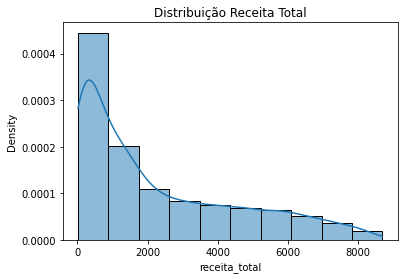

In [42]:
sns.histplot(data=df, x="receita_total", bins=10,  stat="density", kde=True)
plt.title('Distribuição Receita Total')

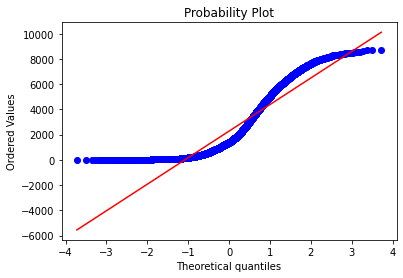

In [48]:
res = stats.probplot(df['receita_total'], plot = plt)

In [26]:
continous_var = ['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']

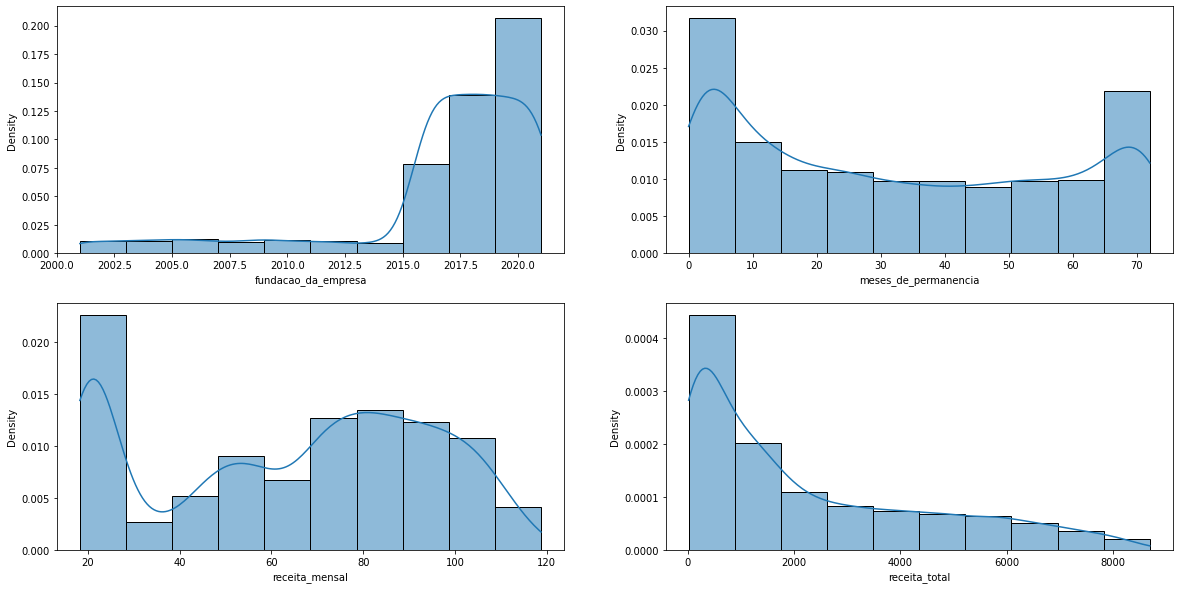

In [104]:
# Olhando a distribuição para todas as variaveis
n_rows=2
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows = n_rows, ncols=n_cols)
fig.set_size_inches(20, 10)

for i, (ax, column) in enumerate(zip(axes.flatten(), continous_var)):
  sns.histplot(df[column], ax=axes[i//n_cols][i%n_cols], bins=10, stat="density", kde=True) 

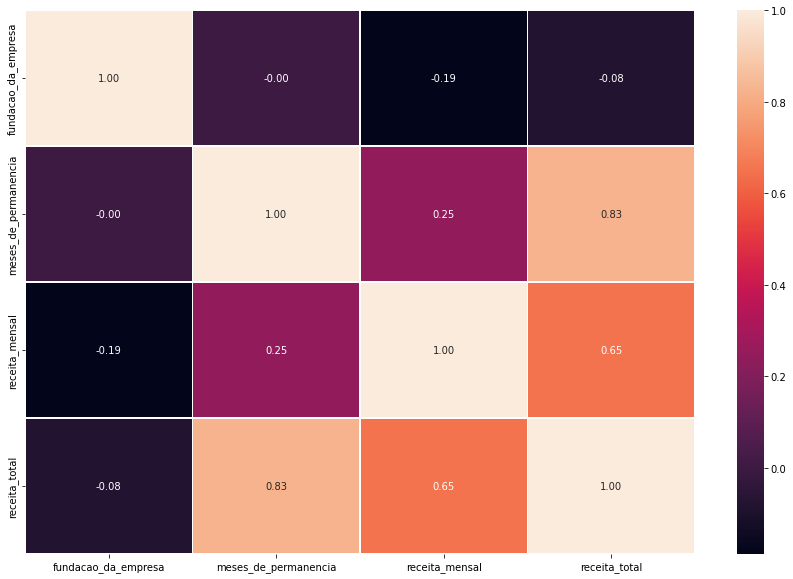

In [108]:
corr_var = df[continous_var].corr()
plt.figure(figsize = (15,10))
sns.heatmap(data = corr_var, linewidths=.5, annot=True,  fmt=".2f")

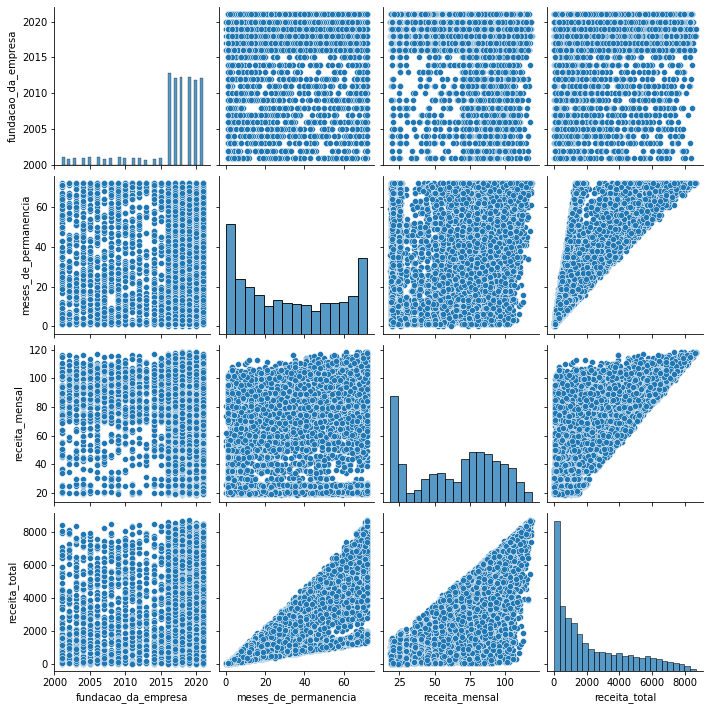

In [152]:
sns.pairplot(df[['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']])
plt.show()

In [138]:
media_por_ano = df[['fundacao_da_empresa', 'meses_de_permanencia', 'receita_mensal', 'receita_total']].groupby('fundacao_da_empresa').mean().sort_values(by='fundacao_da_empresa').reset_index()
media_por_ano.head(21)

fundacao_da_empresa  meses_de_permanencia  receita_mensal  receita_total
0                  2001             32.211765       75.657647    2557.699412
1                  2002             29.057143       83.636429    2665.356429
2                  2003             28.050633       77.804430    2360.703165
3                  2004             34.537500       74.618750    2638.096250
4                  2005             35.045977       82.882184    3017.472414
5                  2006             29.929412       79.801176    2558.332941
6                  2007             33.028169       79.301408    2861.397887
7                  2008             35.810811       79.489189    2943.286486
8                  2009             34.527473       78.081868    2846.268681
9                  2010             38.135135       83.197973    3326.637162
10                 2011             36.626667       80.692000    3190.513333
11                 2012             33.232877       84.144521    2887.383562
12                 2013             33.600000       76.117273    2651.089091
13                 2014             32.098592       80.566197    2807.177465
14                 2015             33.625000       81.718056    2871.099306
15                 2016             32.047619       62.220700    2165.952381
16                 2017             30.577915       62.078277    2054.550826
17                 2018             32.413549       62.465116    2233.629323
18                 2019             32.634694       61.736684    2227.000510
19                 2020             33.690052       61.630628    2271.118796
20                 2021             32.036008       61.140381    2126.330041

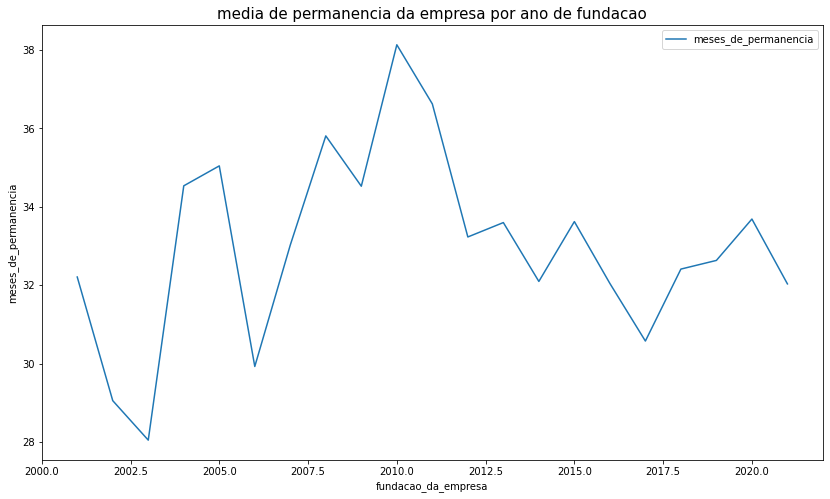

In [129]:
plt.figure(figsize=(14,8))
plt.title("media de permanencia da empresa por ano de fundacao", fontsize=15)
lines = ['meses_de_permanencia']
for line in lines:
    ax = sns.lineplot(x='fundacao_da_empresa', y=line, data=media_por_ano)
plt.legend(lines)

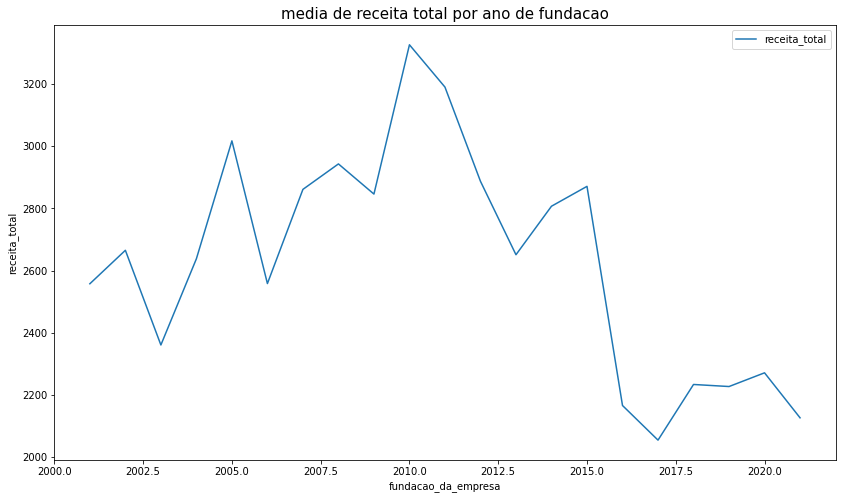

In [137]:
plt.figure(figsize=(14,8))
plt.title("media de receita total por ano de fundacao", fontsize=15)
lines = ['receita_total']
for line in lines:
    ax = sns.lineplot(x='fundacao_da_empresa', y=line, data=media_por_ano)
plt.legend(lines)

In [ ]:
#Teste T para saber se alguns parâmetros influenciam realmente no Churn
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

####H0: Não há diferença entre as médias
####H1: Há diferença

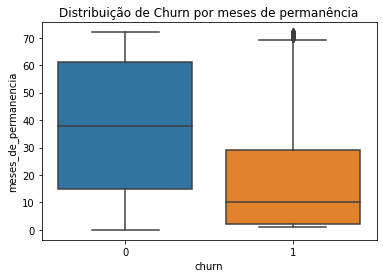

In [141]:
sns.boxplot(x=df.churn, y=df.meses_de_permanencia)
plt.title('Distribuição de Churn por meses de permanência')
plt.show()

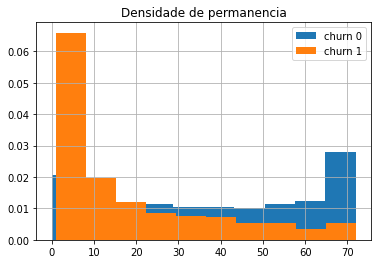

In [143]:
df[df.churn==0]['meses_de_permanencia'].hist(density=True)
df[df.churn==1]['meses_de_permanencia'].hist(density=True)
plt.legend(['churn 0', 'churn 1'])
plt.title('Densidade de permanencia')
plt.show()

In [144]:
stats.ttest_ind(df[df.churn==0]['meses_de_permanencia'], df[df.churn==1]['meses_de_permanencia'])

Ttest_indResult(statistic=31.569995452928403, pvalue=1.0732933837402176e-204)

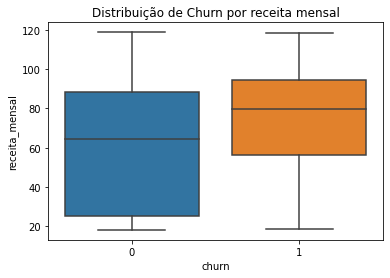

In [149]:
sns.boxplot(x=df.churn, y=df.receita_mensal)
plt.title('Distribuição de Churn por receita mensal')
plt.show()

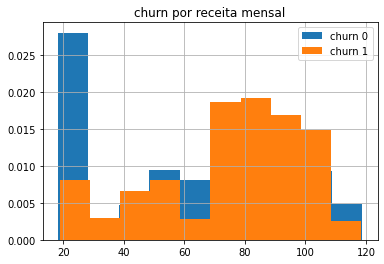

In [150]:
df[df['churn']==0]['receita_mensal'].hist(density=True)
df[df['churn']==1]['receita_mensal'].hist(density=True)
plt.legend(['churn 0', 'churn 1'])
plt.title('churn por receita mensal')
plt.show()

In [151]:
stats.ttest_ind(df[df.churn==0]['receita_mensal'], df[df.churn==1]['receita_mensal'])

Ttest_indResult(statistic=-16.55017772823186, pvalue=2.189014556607605e-60)

#**FE**

In [155]:
## Remoção Outlier por IQR
def iqr_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [156]:
## Remoção Z-score
# Z-Score
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z < 2)]  

In [154]:
df.shape

(7036, 20)

In [159]:
iqr_remove(df,'fundacao_da_empresa').shape

(6314, 20)

In [161]:
iqr_remove(df,'receita_total').shape

(7036, 20)

In [163]:
iqr_remove(df,'meses_de_permanencia').shape

(7036, 20)

In [165]:
iqr_remove(df,'receita_mensal').shape

(7036, 20)

In [160]:
z_score_remove(df,'fundacao_da_empresa').shape

(6479, 20)

In [162]:
z_score_remove(df,'receita_total').shape

(6642, 20)

In [164]:
z_score_remove(df,'meses_de_permanencia').shape

(7036, 20)

In [166]:
z_score_remove(df,'receita_mensal').shape

(7036, 20)

In [167]:
## O primeiro campo a modificar a escala é o target nossa popularidade que vai de 0-100
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
z_score = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler()